## Double click to edit and enter your team data

Student 1 Name: Yousef Yasser Mohamed

Student 1 ID: 55-3437
___
Student 2 Name: Mostafa Hisham

Student 2 ID: 55-2962
___
Student 3 Name: SeifEldin Khaled

Student 3 ID: 55-25218
___
Student 4 Name: Rasheed Atia

Student 4 ID: 55-4451

##**Imports**
Don't remove any import. However, you may add to them if you wish to

In [ ]:
import cv2 # Opencv library is used to manipulate images.
import matplotlib.pyplot as plt # matplotlib used for plotting (showing) images.
import numpy as np # numpy is used to treat images as 2D arrays.

## Helper Functions

In [ ]:
def get_size(image):
    return image.shape

In [ ]:
def get_pixel_value(image, row, col):
    return image[row, col]

Reading (opening an image using opencv) and showing it using matplotlib.

Run the cells below to open and show the image.

In [59]:
# Global variable for the gray-scale image
gray_image = cv2.imread('/content/house.tif', cv2.IMREAD_GRAYSCALE)
gray_image = cv2.resize(gray_image, (256 ,156))

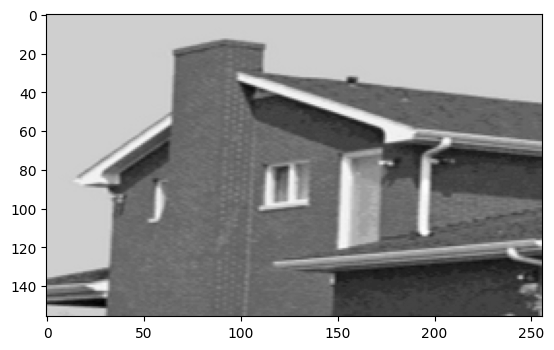

In [60]:
# printing the number of rows and columns in the gray-scale image.
plt.imshow(gray_image, 'gray') # showing the image
plt.show()

# Image Encoding

## Task 1
Convert gray-scale image to binary using a threshold

In [61]:
binary_image = np.zeros((gray_image.shape[0], gray_image.shape[1]), dtype='float64')

def img_to_bin(gray_img):
  # start of your code here
  for i in range(gray_image.shape[0]):
    for j in range(gray_image.shape[1]):
      binary_image[i][j] = gray_image[i][j] >= 128

  return binary_image
  # end of your code here

In [62]:
# Run this cell to test your function.
# (you may change the row number to test with different row indicies)
binary_image = img_to_bin(gray_image)

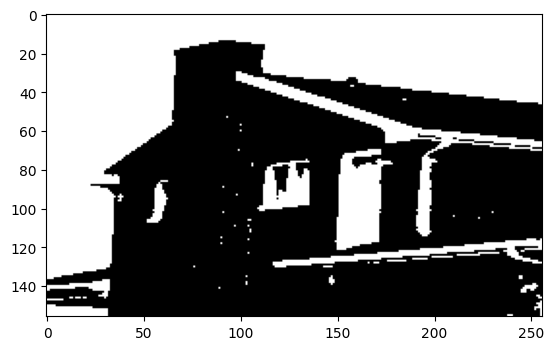

In [63]:
# Run this cell to show the result of your function.
plt.imshow(binary_image, 'gray')
plt.show()

## Task 2

In [64]:
# Global Variables
CODE = []
binary_image[100]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [65]:
# Get the indices of ones in a certain row number.

def get_indicies_of_starting_ones(twoD_array, row_index):
    # start your code here
    starting_ones = []

    if twoD_array[row_index][0]:
      starting_ones.append(0)

    for i in range(len(twoD_array[row_index]) - 1):
      if not twoD_array[row_index][i] and twoD_array[row_index][i+1]:
        starting_ones.append(i+1)

    return starting_ones
    # end your code here

In [66]:
# Run this cell to test your function
# (you may change the row number to test with different row indicies)

indicies = get_indicies_of_starting_ones(binary_image, 100)
indicies

[0, 56, 109, 151, 192]

## Task 3

In [ ]:
# Get the length of runs in a certain row number.

def get_length_of_runs(twoD_array, row_index):
    # start your code here
    consecutive_ones = []
    count = 0

    for i in range(len(twoD_array[row_index])):
      if twoD_array[row_index][i]:
        count += 1
      else:
        if count:
          consecutive_ones.append(count)
          count = 0

    if count:
      consecutive_ones.append(count)

    return consecutive_ones
    # end your code here

In [ ]:
# Run this cell to test your function
# (you may change the row number to test with different row indicies)
lengths_of_ones = get_length_of_runs(binary_image, 100)
lengths_of_ones

[35, 5, 13, 22, 6]

## Task 4

In [67]:
# Encode the image as a long string separated by commas.
# The encoding format for a single run is: 'row number_(starting position of the continuous 1s) × 1000 + (number of continuous 1s)'
def encoding_image(twoD_array):
    # start your code here
    encoded_image = ""
    for i in range(len(twoD_array)):
      indicies = get_indicies_of_starting_ones(twoD_array, i)
      length_of_ones = get_length_of_runs(twoD_array, i)

      for j in range(len(indicies)):
        res = indicies[j] * 1000 + length_of_ones[j]
        encoded_image += f"{i}_{res}, "

    return encoded_image[:len(encoded_image)-2]
    # end your code here

In [68]:
# Run this cell to test your function
CODE = encoding_image(binary_image)
CODE

'0_256, 1_256, 2_256, 3_256, 4_256, 5_256, 6_256, 7_256, 8_256, 9_256, 10_256, 11_256, 12_256, 13_256, 14_89, 14_98158, 15_84, 15_106150, 16_79, 16_113143, 17_74, 17_113143, 18_69, 18_113143, 19_66, 19_112144, 20_66, 20_112144, 21_66, 21_112144, 22_67, 22_112144, 23_67, 23_112144, 24_67, 24_111145, 25_67, 25_111145, 26_67, 26_111145, 27_67, 27_111145, 28_67, 28_112144, 29_67, 29_112144, 30_67, 30_98003, 30_112144, 31_67, 31_98006, 31_116140, 32_66, 32_98009, 32_124132, 33_66, 33_98015, 33_133023, 33_160096, 34_66, 34_98017, 34_147008, 34_161095, 35_66, 35_101018, 35_161095, 36_66, 36_104018, 36_165091, 37_66, 37_107018, 37_157002, 37_173083, 38_66, 38_110018, 38_183073, 39_66, 39_113018, 39_189067, 40_66, 40_116018, 40_199057, 41_66, 41_119018, 41_208048, 42_66, 42_122018, 42_217039, 43_66, 43_125019, 43_226030, 44_66, 44_128019, 44_184002, 44_234022, 45_66, 45_131019, 45_243013, 46_66, 46_135018, 46_254002, 47_66, 47_138018, 48_66, 48_141018, 49_66, 49_144018, 50_65, 50_147018, 51_65,

# Image Decoding

## Task 1

In [69]:
# Get the substrings of the string that have the same row number
def split_string(CODE, row_index):
    # start your code here
    res = [x.strip() for x in CODE.split(',')]
    res = [x for x in res if int(x.split('_')[0]) == row_index]

    return res
    # end your code here

In [70]:
# Run this cell to test your function
# (you may change the row number to test with different row indicies)
substrings = split_string(CODE, 100)
substrings

['100_35', '100_56005', '100_109013', '100_151022', '100_192006']

## Task 2

In [71]:
# To decode a single row

def decode_row(width, height, CODE, row_index):
    # start your code here
    row_encoding = split_string(CODE, row_index)
    row_encoding = [int(x.split('_')[1]) for x in row_encoding]

    indicies = [x//1000 for x in row_encoding]
    lengths_of_ones = [x - (x//1000)*1000 for x in row_encoding]

    res = [0]*width
    for i in range(len(indicies)):
      for j in range(lengths_of_ones[i]):
        res[indicies[i]+j] = 1

    return res
    # end your code here

In [72]:
# Run this cell to test your function
# (you may change the row number to test with different row indicies)
decoded_row = decode_row(gray_image.shape[1], gray_image.shape[0], CODE, 100)
decoded_row

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


## Task 3

In [73]:
# constructing the image back

def construct_image(width,height,encoding):
    res = [[0]*width]*height
    # start your code here
    for i in range(height):
      res[i] = decode_row(gray_image.shape[1], gray_image.shape[0], CODE, i)

    return res
    # end your code here

In [74]:
# Run this cell to test your function
reconstructed_image = construct_image(gray_image.shape[1], gray_image.shape[0],CODE)
reconstructed_image

[[1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,


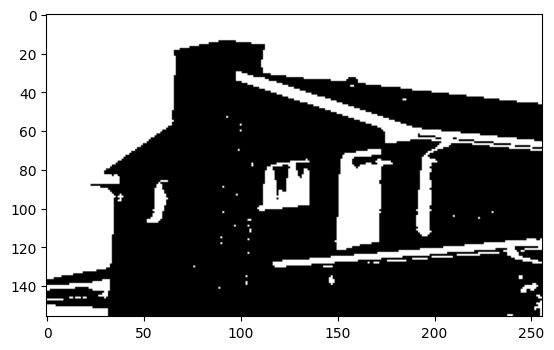

In [75]:
# Run this cell to show your reconstructed image
plt.imshow(reconstructed_image, 'gray')
plt.show()